<a href="https://colab.research.google.com/github/mariamadalina/pytrends/blob/master/Copy_of_videoBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install youtube_dl
!pip install pafy
!pip install emoji
!pip install Unidecode
!pip install gensim
!pip install Word2Vec
!pip install nltk


     |████████████████████████████████| 1.8MB 2.8MB/s 
     |████████████████████████████████| 51kB 1.4MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=0a37ed62b85f0f54fc010fc768519ced0d6ae6df90d727a4495762891bd02f9b
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 245kB 2.6MB/s 
     |████████████████████████████████| 71kB 2.2MB/s 
  Created wheel for Word2Vec: filename=word2vec-0.10.6-cp36-cp36m-linux_x86_64.whl size=131438 sha256=7b306f40d885b44b4fab2e42e9369151ed432ab8252c14a79ab6eb84b6f7dad8
  Stored in directory: /root/.cache/pip/wheels/d7/d2/04/b93168fa0dd297aaf22624e39d89b1b7261ceddad8f34698c7
Successfully built Word2Vec


In [0]:
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy
from numpy.testing import assert_almost_equal
import time
import os
import numpy as np
# from tagger import Tagger

In [0]:
top_of = 100

In [0]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-05-06 20:40:15--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.143.198
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.143.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  60.9MB/s    in 24s     

2020-05-06 20:40:39 (65.9 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
!wget -P /root/input/ -c "http://lcl.uniroma1.it/nasari/files/NASARIembed+UMBC_w2v.bin"

--2020-04-20 13:14:05--  http://lcl.uniroma1.it/nasari/files/NASARIembed+UMBC_w2v.bin
Resolving lcl.uniroma1.it (lcl.uniroma1.it)... 151.100.179.52
Connecting to lcl.uniroma1.it (lcl.uniroma1.it)|151.100.179.52|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6932614670 (6.5G) [application/octet-stream]
Saving to: ‘/root/input/NASARIembed+UMBC_w2v.bin’

NASARIembed+UMBC_w2 100%[===================>]   6.46G  8.08MB/s    in 17m 16s 

2020-04-20 13:31:21 (6.38 MB/s) - ‘/root/input/NASARIembed+UMBC_w2v.bin’ saved [6932614670/6932614670]



In [0]:
from gensim.models import Word2Vec,KeyedVectors
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np 
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
EMBEDDING_FILE_NASARI = '/root/input/NASARIembed+UMBC_w2v.bin'

vocabulary = {} # key is the word, value is the index
inverse_vocabulary = ['<unk>'] # value is the word, index is the index
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
# check this https://radimrehurek.com/gensim/models/word2vec.html
# binary = true is because the word2vec file we have has a bin suffix, if it's text file, binary = false
# key is the word, value is a 300 dimensional vector for each word


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def get_category(video_category):
  if (video_category=='Food & Drinks'):
    return category_identifier.get_categpry_id('Food & Drink')
  elif (video_category=='Autos & Vehicles'):
    return category_identifier.get_categpry_id('Autos & Vehicles')
  elif (video_category=='Pets & Animals'):
    return category_identifier.get_categpry_id('Pets & Animals')
  elif (video_category=='Computers & Electronics'):
    return category_identifier.get_categpry_id('Computers & Electronics')


In [0]:
video_df=pd.read_csv('video (6).csv')
video_df=video_df[video_df['video_category'].notna()]
video_df['id']=video_df['url'].apply(lambda x: x.replace('https://www.youtube.com/watch?v=','')
keywords_df=pd.read_csv('video_keywords (11).csv')

SyntaxError: ignored

In [0]:
keywords_df=pd.read_csv('sample_videos.csv')
video_df=pd.read_csv('video (6).csv')
video_df=video_df[video_df['id'].isin(['uVnDJMjNySg', 'c_XnMwhAI4I', 'Bbk5RcH0bbQ', 'J6eJtNvTWII', '4jk0Cq_vU2A', 'XMA7r6xlwH8', '9Hh_vdDk4Kg', 'WAGA9TAvqXk'])]
video_df.head()

In [0]:
print (video_df.video_category.unique(),keywords_df.columns)

['Autos & Vehicles' 'Pets & Animals' 'Food & Drinks'
 'Computers & Electronics'] Index(['video_id', 'Tag', 'word_count'], dtype='object')


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pytrends import pytrends


category_identifier = pytrends.utils.CategoryRead()


tags_df = pd.DataFrame(columns=['Category','google_trends_category','google_trends'])
# Login to Google. Only need to run this once, the rest of requests will use the same session.

google_trends={}
for category in video_df.video_category.unique():
  

  print (category)
  search_category = get_category(category)
  print(search_category)

  category_identifier.set_related_searches(category,search_category,google_trends,top_of=200)
  for ngram in google_trends[category]:  
    tags_df.loc[len(tags_df)] = {'Category':category,'google_trends_category':search_category,'google_trends':ngram}

tags_df.to_csv('all_tags.csv')
 

Autos & Vehicles
47
Pets & Animals
66
Food & Drinks
71
Computers & Electronics
5


In [0]:
tags_df= pd.read_csv('all_tags (3).csv')

In [0]:
google_trends=tags_df.copy()

In [0]:
google_trends.columns

Index(['Unnamed: 0', 'Category', 'google_trends_category', 'google_trends'], dtype='object')

In [0]:
word2vec.init_sims(replace=True)
similarity = word2vec.similarity('woman', 'man')
print (similarity)

0.76640123


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_similarity(feature_vec_1, feature_vec_2):
  return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [0]:
from gensim.models import Word2Vec,KeyedVectors
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np 
import re
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import pandas as pd


class MySentences(object):
  def __init__(self,model,coco_categories:pd.DataFrame=None):
    self.model=model
    self.coco_categories=coco_categories

  def sentence_vectorize(self,sentence):
    sent_vec=[]
    num_words=0
    words = [word for word in sentence if word in self.model.wv.vocab and word not in stop_words]
    if len(words) >= 1:
      return np.mean(self.model[words], axis=0)
    else:
      return []

  def sent2vec(self,sentence):
      
      s=sentence.split()
      words = [w for w in s if w in self.model.wv.vocab and w not in stop_words]
      words = [w for w in words if w.isalpha()]
      if len(words) ==0:
        return []
      else:

        M = []
        for w in words:
            try:
                M.append(self.model[w])
            except:
                continue
        M = np.array(M)
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())

In [0]:
def get_tags(tags):
  return set(tags.split())

def get_tags_sentence(tags):
  tags_v = []
  for tag in tags:
    for t in tag.split():
      tags_v.append(t)
  return " ".join(tags_v)



Sentece similarity

In [0]:
#@title Sentence similarity
from gensim.models import Word2Vec,KeyedVectors
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np 
import re
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import ast
import gensim
from nltk.corpus import stopwords
from tqdm import tqdm_notebook
from nltk import word_tokenize
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from nltk import word_tokenize


  
from sklearn import cluster,metrics
import warnings
warnings.filterwarnings('ignore')


word2vec.init_sims(replace=True)
sentence_vectorizer= MySentences(word2vec)

tags_df = pd.DataFrame(columns=['Category','video_id','videoUrl','Title','original_tags', 'Tags','google_trends',
                                    'EMD','cosine','cityblock',
                                    'canberra_distance','euclidean','minkowski','braycurtis',
                                    'similarity_word_2_vec'])
# Login to Google. Only need to run this once, the rest of requests will use the same session.

number_of_tags=4
for video in video_df.itertuples():
  print ('*'*100)
  print (video)
  category = video.video_category
  video_url = video.url
  tags = keywords_df[keywords_df['video_id']==video.id].Tag.values[:number_of_tags]
  title= video.Title
  # print ('*'*20,'tags',tags)
  key_tags = get_tags_sentence(tags)
  # print ('*'*20,'keytags',key_tags)

  if (len(key_tags)==0):
    continue
  keywords_embedding=sentence_vectorizer.sent2vec(key_tags)

  sentences = []
  sentences = google_trends[google_trends['Category']==category].google_trends

  for sentence in sentences :
    sentence_embedding = sentence_vectorizer.sent2vec(sentence)
    if len(sentence_embedding)==0:
      continue
    similarity = get_cosine_similarity(keywords_embedding, sentence_embedding)
    distancew = word2vec.wmdistance(key_tags, sentence)
    cosine_distance = cosine(keywords_embedding, sentence_embedding)
    cityblock_distance = cityblock(keywords_embedding, sentence_embedding)
      
    canberra_distance = canberra(keywords_embedding, sentence_embedding)
    euclidean_distance = euclidean(keywords_embedding, sentence_embedding) 
    minkowski_distance = minkowski(keywords_embedding, sentence_embedding, 3)
    braycurtis_distance = braycurtis(keywords_embedding, sentence_embedding)
   
          
    tags_df.loc[len(tags_df)] = {'Category':category,'video_id':video.id,'videoUrl':video_url,'Title':title,'original_tags':', '.join(tags),'Tags': key_tags,'google_trends':sentence,
                                    'EMD':distancew,'cosine':cosine_distance,'cityblock':cityblock_distance,
                                    'canberra_distance':canberra_distance,'euclidean':euclidean_distance,'minkowski':minkowski_distance,'braycurtis':braycurtis_distance,
                                    'similarity_word_2_vec':similarity,
                                    }

In [0]:
tags_df[tags_df['video_id']=='UEJbKLZ7RmM'].sort_values(['similarity_word_2_vec'],ascending=[False]).head()

,Category,video_id,videoUrl,Title,original_tags,Tags,google_trends,EMD,cosine,cityblock,canberra_distance,euclidean,minkowski,braycurtis,similarity_word_2_vec
66,Autos & Vehicles,UEJbKLZ7RmM,https://www.youtube.com/watch?v=UEJbKLZ7RmM,How to Restore Headlights PERMANENTLY,"headlight restoration toothpaste, headlight cl...",headlight restoration toothpaste headlight cle...,how to tint car windows,0.358698,0.459507,13.373025,168.343006,0.958652,0.430670,0.541302,0.540493
110,Autos & Vehicles,UEJbKLZ7RmM,https://www.youtube.com/watch?v=UEJbKLZ7RmM,How to Restore Headlights PERMANENTLY,"headlight restoration toothpaste, headlight cl...",headlight restoration toothpaste headlight cle...,bust the windows out your car,0.435341,0.538038,14.013577,177.465988,1.037341,0.477795,0.598299,0.461962
14,Autos & Vehicles,UEJbKLZ7RmM,https://www.youtube.com/watch?v=UEJbKLZ7RmM,How to Restore Headlights PERMANENTLY,"headlight restoration toothpaste, headlight cl...",headlight restoration toothpaste headlight cle...,car patrol,0.604686,0.569176,15.118774,188.651418,1.066936,0.478911,0.638516,0.430824
145,Autos & Vehicles,UEJbKLZ7RmM,https://www.youtube.com/watch?v=UEJbKLZ7RmM,How to Restore Headlights PERMANENTLY,"headlight restoration toothpaste, headlight cl...",headlight restoration toothpaste headlight cle...,car horn,0.666610,0.572667,14.642807,181.521752,1.070202,0.484999,0.627726,0.427333
160,Autos & Vehicles,UEJbKLZ7RmM,https://www.youtube.com/watch?v=UEJbKLZ7RmM,How to Restore Headlights PERMANENTLY,"headlight restoration toothpaste, headlight cl...",headlight restoration toothpaste headlight cle...,300 car barn find,0.778964,0.577952,15.083490,189.989028,1.075130,0.481301,0.657375,0.422048


In [0]:
__mask_greater = np.vectorize(lambda x, threshold: 1 if x > threshold else 0)
__mask_lower = np.vectorize(lambda x, threshold: 1 if x < threshold else 0) 
max_phrases=10

In [0]:
#@title Sentence similarity grouping
dummy=tags_df.groupby(['Category','video_id','videoUrl','Title','original_tags','Tags','google_trends'])['similarity_word_2_vec','cosine','cityblock','canberra_distance','euclidean','minkowski','braycurtis','EMD']\
.nth(0).reset_index().copy()
dummy=dummy.loc[dummy['similarity_word_2_vec']>0].sort_values(['similarity_word_2_vec']).copy()
dummy['label_cosine'] = 0
dummy['label_cityblock'] = 0
dummy['label_canberra_distance'] = 0
dummy['label_euclidean'] = 0
dummy['label_minkowski'] = 0
dummy['label_braycurtis'] = 0
dummy['label_EMD'] = 0
for row, group in dummy.loc[dummy['similarity_word_2_vec']>0].sort_values(['similarity_word_2_vec']).groupby(['Category','videoUrl','Tags']):
    dummy.loc[group.index,'label_cosine']=__mask_lower(group['cosine'],group['cosine'].mean())
    dummy.loc[group.index,'label_cityblock']=__mask_lower(group['cityblock'],group['cityblock'].mean())
    dummy.loc[group.index,'label_canberra_distance']=__mask_lower(group['canberra_distance'],group['canberra_distance'].mean())
    dummy.loc[group.index,'label_euclidean']=__mask_lower(group['euclidean'],group['euclidean'].mean())
    dummy.loc[group.index,'label_minkowski']=__mask_lower(group['minkowski'],group['minkowski'].mean())
    dummy.loc[group.index,'label_braycurtis']=__mask_lower(group['braycurtis'],group['braycurtis'].mean())
    dummy.loc[group.index,'label_EMD']=__mask_lower(group['EMD'],group['EMD'].mean())

dummy.loc[dummy['similarity_word_2_vec']>0]\
.loc[(dummy['label_cosine']==1)&(dummy['label_EMD']==1)&(dummy['label_cityblock']==1)&(dummy['label_canberra_distance']==1)&(dummy['label_minkowski']==1)&(dummy['label_euclidean']==1)&(dummy['label_braycurtis']==1)]\
.sort_values(['similarity_word_2_vec'],ascending=[False])\
.groupby(['Category','videoUrl','Tags'])['Category','video_id','videoUrl','Title','original_tags','Tags','similarity_word_2_vec','google_trends'].head(max_phrases)\
.reset_index()\
.to_csv('sentence_similarity_sample{0}.csv'.format(number_of_tags), index=False)

# .to_csv('filtered_nasari_weighted_similarity_top_10.csv',index=False)

Cluster level

In [0]:
def get_keywords(sentences):
  keywords=[]
  for s in sentences:
    for k in s.split():
      keywords.append(k)
  return set(keywords)

get_keywords(['relaxing time','time to relax','relaxing'])

{'relax', 'relaxing', 'time', 'to'}

In [0]:
#@title Cluster level
from gensim.models import Word2Vec,KeyedVectors
import nltk
from nltk.cluster import KMeansClusterer
import re
from nltk.corpus import stopwords
import ast
import pandas as pd
import numpy as np


import gensim
from tqdm import tqdm_notebook
from nltk import word_tokenize
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
stop_words = stopwords.words('english')
import numpy as np 
from operator import itemgetter 
from itertools import groupby 
  
from sklearn import cluster
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity
NUM_CLUSTERS=2

word2vec.init_sims(replace=True)
sentence_vectorizer= MySentences(word2vec)

clusters_df = pd.DataFrame(columns=['Category','videoUrl','Title','Tags','cluster','cluster_id', 'Tags_count','google_trends',
                                    'EMD','cosine','cityblock', 'canberra_distance','euclidean','minkowski','braycurtis','similarity_word_2_vec',
                                    'EMD_cluster','cosine_cluster','cityblock_cluster','canberra_distance_cluster','euclidean_cluster','minkowski_cluster','braycurtis_cluster',
                                    'similarity_word_2_vec_cluster'        ])
number_of_tags=4
# Login to Google. Only need to run this once, the rest of requests will use the same session.
for video in video_df.itertuples():
  print ('*'*100)
  print (video)
  category = video.video_category
  video_url = video.url
  tags = keywords_df[keywords_df['video_id']==video.id].Tag.values[:number_of_tags]
  title= video.Title
  # print ('*'*20,'tags',tags)
  key_tags = get_tags_sentence(tags)
  # print ('*'*20,'keytags',key_tags)

  if (len(key_tags)==0):
    continue

  keywords= [w for w in get_keywords(tags) if w in word2vec.wv.vocab]
  print('*'*20)
  print(keywords)
  sentences = []
  sentences = google_trends[google_trends['Category']==category].google_trends
  print (len(sentences), ' sentences ' )

  ck=min([len(keywords),NUM_CLUSTERS])
  X = word2vec[keywords]
  kclusterer = KMeansClusterer(ck, distance=nltk.cluster.util.cosine_distance, repeats=25)
  assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
  print (assigned_clusters)

  clusters = {}
  for i,w in zip(assigned_clusters,keywords):
    if i in clusters.keys():
      clusters[i].append(w)
    else:
      clusters[i]=[w]
  print('*'*20,clusters)

  keywords_embedding=sentence_vectorizer.sent2vec(key_tags)
  for sentence in sentences :
    if sentence != keywords:
      sentence_embedding = sentence_vectorizer.sent2vec(sentence)
      if len(sentence_embedding)==0:
        continue
      similarity = get_cosine_similarity(keywords_embedding, sentence_embedding)
      distancew = word2vec.wmdistance(keywords, sentence.split(' '))
      cosine_distance = cosine(keywords_embedding, sentence_embedding)
      cityblock_distance = cityblock(keywords_embedding, sentence_embedding)
      canberra_distance = canberra(keywords_embedding, sentence_embedding)
      euclidean_distance = euclidean(keywords_embedding, sentence_embedding) 
      minkowski_distance = minkowski(keywords_embedding, sentence_embedding, 3)
      braycurtis_distance = braycurtis(keywords_embedding, sentence_embedding)
      for cluster,words in clusters.items():
        cluster_sentence =' '.join(words)
        cluster_embedding = sentence_vectorizer.sent2vec(cluster_sentence)
        if len(cluster_embedding)==0:
          continue
        similarity_cluster=get_cosine_similarity(cluster_embedding,sentence_embedding)
        distancew_word = word2vec.wmdistance(words, sentence.split(' '))
        cosine_distance_word = cosine(cluster_embedding, sentence_embedding)
        cityblock_distance_word = cityblock(cluster_embedding, sentence_embedding)
        canberra_distance_word = canberra(cluster_embedding, sentence_embedding)
        euclidean_distance_word = euclidean(cluster_embedding, sentence_embedding) 
        minkowski_distance_word = minkowski(cluster_embedding, sentence_embedding, 3)
        braycurtis_distance_word = braycurtis(cluster_embedding, sentence_embedding)

          
        clusters_df.loc[len(clusters_df)] = {'Category':category,'videoUrl':video_url,'Title':title,'Tags': key_tags,'cluster':cluster_sentence,'cluster_id':cluster,'Tags_count':len(keywords),'google_trends':sentence,
                                      'EMD_cluster':distancew_word,'cosine_cluster':cosine_distance_word,'cityblock_cluster':cityblock_distance_word,
                                      'canberra_distance_cluster':canberra_distance_word,'euclidean_cluster':euclidean_distance_word,'minkowski_cluster':minkowski_distance_word,'braycurtis_cluster':braycurtis_distance_word,
                                      'similarity_word_2_vec_cluster':similarity_cluster,
                                      'EMD':distancew,'cosine':cosine_distance,'cityblock':cityblock_distance,
                                    'canberra_distance':canberra_distance,'euclidean':euclidean_distance,'minkowski':minkowski_distance,'braycurtis':braycurtis_distance,
                                    'similarity_word_2_vec':similarity,
                                    }

In [0]:
#@title Cluster level grouping
__mask_greater = np.vectorize(lambda x, threshold: 1 if x > threshold else 0)
__mask_lower = np.vectorize(lambda x, threshold: 1 if x < threshold else 0)
max_phrases=10;  
dummy=clusters_df.copy()
dummy=dummy.loc[(dummy['similarity_word_2_vec']>0) & (dummy['similarity_word_2_vec_cluster']>0)].sort_values(['similarity_word_2_vec','similarity_word_2_vec_cluster'],ascending=[False,False]).copy()
dummy['label_cosine_cluster'] = 0
dummy['label_cityblock_cluster'] = 0
dummy['label_canberra_distance_cluster'] = 0
dummy['label_euclidean_cluster'] = 0
dummy['label_minkowski_cluster'] = 0
dummy['label_braycurtis_cluster'] = 0
dummy['label_EMD_cluster'] = 0
for row, group in dummy.loc[dummy['similarity_word_2_vec']>0].sort_values(['similarity_word_2_vec']).groupby(['Category','videoUrl','Tags','cluster_id']):
    dummy.loc[group.index,'label_cosine_cluster']=__mask_lower(group['cosine_cluster'],group['cosine_cluster'].mean())
    dummy.loc[group.index,'label_cityblock_cluster']=__mask_lower(group['cityblock_cluster'],group['cityblock_cluster'].mean())
    dummy.loc[group.index,'label_canberra_distance_cluster']=__mask_lower(group['canberra_distance_cluster'],group['canberra_distance_cluster'].mean())
    dummy.loc[group.index,'label_euclidean_cluster']=__mask_lower(group['euclidean_cluster'],group['euclidean_cluster'].mean())
    dummy.loc[group.index,'label_minkowski_cluster']=__mask_lower(group['minkowski_cluster'],group['minkowski_cluster'].mean())
    dummy.loc[group.index,'label_braycurtis_cluster']=__mask_lower(group['braycurtis_cluster'],group['braycurtis_cluster'].mean())
    dummy.loc[group.index,'label_EMD_cluster']=__mask_lower(group['EMD_cluster'],group['EMD_cluster'].mean())

intermediatedf= dummy.loc[dummy['similarity_word_2_vec']>0]\
.loc[(dummy['label_cosine_cluster']==1)&(dummy['label_EMD_cluster']==1)&(dummy['label_cityblock_cluster']==1)&(dummy['label_canberra_distance_cluster']==1)&(dummy['label_minkowski_cluster']==1)&(dummy['label_euclidean_cluster']==1)&(dummy['label_braycurtis_cluster']==1)]\
.sort_values(['similarity_word_2_vec', 'similarity_word_2_vec_cluster'],ascending=[False,False])\
.groupby(['Category','videoUrl','Tags','google_trends']).nth(0)\
.reset_index()\

intermediatedf.sort_values(['similarity_word_2_vec'],ascending=[False]).groupby(['Category','videoUrl','Tags'])['Category','videoUrl','Title','Tags','cluster','google_trends','similarity_word_2_vec'].head(max_phrases)\
.reset_index()\
.to_csv('cluster_similarity_sample{0}.csv'.format(number_of_tags))

*Word* level

In [0]:
#@title Word level
from gensim.models import Word2Vec,KeyedVectors
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np 
import re
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import ast
import gensim
from nltk.corpus import stopwords
from tqdm import tqdm_notebook
from nltk import word_tokenize
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from nltk import word_tokenize


  
from sklearn import cluster,metrics
import warnings
warnings.filterwarnings('ignore')

max_phrases=10
word2vec.init_sims(replace=True)
sentence_vectorizer= MySentences(word2vec)

tags_df = pd.DataFrame(columns=['Category','videoUrl','Title','Tags','word', 'Tags_count','google_trends',
                                    'EMD','cosine','cityblock',
                                    'canberra_distance','euclidean','minkowski','braycurtis',
                                    'similarity_word_2_vec','EMD_word','cosine_word','cityblock_word',
                                    'canberra_distance_word','euclidean_word','minkowski_word','braycurtis_word',
                                    'similarity_word_2_vec_word'])
# Login to Google. Only need to run this once, the rest of requests will use the same session.


number_of_tags=4
# Login to Google. Only need to run this once, the rest of requests will use the same session.
for video in video_df.itertuples():
  print ('*'*100)
  print (video)
  category = video.video_category
  video_url = video.url
  tags = keywords_df[keywords_df['video_id']==video.id].Tag.values[:number_of_tags]
  title= video.Title
  # print ('*'*20,'tags',tags)
  key_tags = get_tags_sentence(tags)
  # print ('*'*20,'keytags',key_tags,len(key_tags))

  if (len(key_tags)==0):
    continue

  keywords_embedding=sentence_vectorizer.sent2vec(key_tags)
  sentences = []
  sentences = google_trends[google_trends['Category']==category].google_trends
  print (len(sentences), ' sentences ' )

  for sentence in sentences :
    
    sentence_embedding = sentence_vectorizer.sent2vec(sentence)
    if len(sentence_embedding)==0:
      continue
    similarity = get_cosine_similarity(keywords_embedding, sentence_embedding)
    cosine_distance = cosine(keywords_embedding, sentence_embedding)
    cityblock_distance = cityblock(keywords_embedding, sentence_embedding)
    distancew = word2vec.wmdistance(key_tags, sentence)  
    canberra_distance = canberra(keywords_embedding, sentence_embedding)
    euclidean_distance = euclidean(keywords_embedding, sentence_embedding) 
    minkowski_distance = minkowski(keywords_embedding, sentence_embedding, 3)
    braycurtis_distance = braycurtis(keywords_embedding, sentence_embedding)
    for index, word in enumerate(key_tags.split()):
      if (word not in word2vec.wv.vocab):
        continue
      word_embedding = sentence_vectorizer.sent2vec(word)
      
      similarity_word=get_cosine_similarity(word_embedding,sentence_embedding)
      cosine_distance_word = cosine(word_embedding, sentence_embedding)
      cityblock_distance_word = cityblock(word_embedding, sentence_embedding)
      distancew_word = word2vec.wmdistance(word, sentence)
      canberra_distance_word = canberra(word_embedding, sentence_embedding)
      euclidean_distance_word = euclidean(word_embedding, sentence_embedding) 
      minkowski_distance_word = minkowski(word_embedding, sentence_embedding, 3)
      braycurtis_distance_word = braycurtis(word_embedding, sentence_embedding)

          
      tags_df.loc[len(tags_df)] = {'Category':category,'videoUrl':video_url,'Title':title,'Tags':key_tags,'word':word,'Tags_count':len(tags),'google_trends':sentence,
                                      'EMD_word':distancew_word,'cosine_word':cosine_distance_word,'cityblock_word':cityblock_distance_word,
                                      'canberra_distance_word':canberra_distance_word,'euclidean_word':euclidean_distance_word,'minkowski_word':minkowski_distance_word,'braycurtis_word':braycurtis_distance_word,
                                      'similarity_word_2_vec_word':similarity_word,
                                   'EMD':distancew,'cosine':cosine_distance,'cityblock':cityblock_distance,
                                    'canberra_distance':canberra_distance,'euclidean':euclidean_distance,'minkowski':minkowski_distance,'braycurtis':braycurtis_distance,
                                    'similarity_word_2_vec':similarity,
                                    }

In [0]:
#@title Word level grouping
__mask_greater = np.vectorize(lambda x, threshold: 1 if x > threshold else 0)
__mask_lower = np.vectorize(lambda x, threshold: 1 if x < threshold else 0)
def weighting_match(x):
  d={}
  # d['similarity_word_2_vec']=   (x['word'].count() /x['Tags_count'].max())*x['similarity_word_2_vec'].mean()
  d['similarity_word_2_vec']=   x['similarity_word_2_vec'].mean()
  return pd.Series(d)

all_df=pd.DataFrame()

for key, group in tags_df.loc[((tags_df['similarity_word_2_vec_word']>0) & (tags_df['similarity_word_2_vec']>0))]\
.sort_values(['similarity_word_2_vec','similarity_word_2_vec_word'],ascending=[True,True])\
.groupby(['Category','videoUrl','Tags','word']):
  grp = group.copy()
  grp['label_EMD'] = __mask_lower(grp['EMD_word'],grp['EMD_word'].mean())
  grp['label_cosine'] = __mask_lower(grp['cosine_word'],grp['cosine_word'].mean())
  grp['label_cityblock'] = __mask_lower(grp['cityblock_word'],grp['cityblock_word'].mean())
  grp['label_canberra_distance'] = __mask_lower(grp['canberra_distance_word'],grp['canberra_distance_word'].mean())
  grp['label_euclidean'] = __mask_lower(grp['euclidean_word'],grp['euclidean_word'].mean())
  grp['label_minkowski'] = __mask_lower(grp['minkowski_word'],grp['minkowski_word'].mean())
  grp['label_braycurtis'] = __mask_lower(grp['braycurtis_word'],grp['braycurtis_word'].mean())
  grp= grp.loc[(grp['label_euclidean']==1)&(grp['label_cosine']==1)&(grp['label_EMD']==1)&(grp['label_cityblock']==1)&(grp['label_canberra_distance']==1)&(grp['label_minkowski']==1)&(grp['label_braycurtis']==1)]
  all_df= pd.concat([all_df,grp],axis=0,ignore_index=True)
  

intermediate_df = all_df.loc[((all_df['similarity_word_2_vec_word']>0) & (all_df['similarity_word_2_vec']>0))].sort_values(['similarity_word_2_vec'],ascending=[False])\
.groupby(['Category','videoUrl','Tags','Title','google_trends'])\
.apply(weighting_match).reset_index()

intermediate_df.sort_values(['similarity_word_2_vec'],ascending=[False])\
.groupby(['Category','videoUrl','Tags','Title'])['Category','videoUrl','Title','Tags','similarity_word_2_vec','google_trends'].head(max_phrases)\
.to_csv('word_level_{0}.csv'.format(number_of_tags),index=False)

# intermediate_df = all_df.loc[((all_df['similarity_word_2_vec_word']>0) & (all_df['similarity_word_2_vec']>0))].sort_values(['similarity_word_2_vec'],ascending=[False])

# intermediate_df.groupby(['Category','videoUrl','Tags','Title'])['Category','videoUrl','Title','Tags','similarity_word_2_vec','google_trends'].head(max_phrases)\
# .to_csv('word_level_{0}.csv'.format(number_of_tags),index=False)

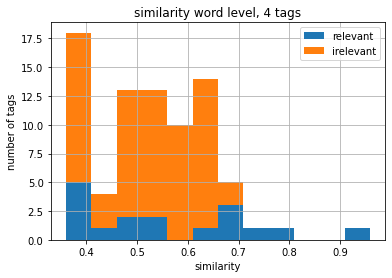

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from matplotlib.patches import Rectangle
tags=4
data=pd.DataFrame()


sentence_df=pd.read_csv('word_level_{0}.csv'.format(tags))
data['relevant']=sentence_df['similarity_word_2_vec']*sentence_df['Video_evaluation']
data['irelevant']=sentence_df['similarity_word_2_vec']*(1-sentence_df['Video_evaluation'])
binwidth = 0.05  # chose an arbitrary value here
x=sentence_df['similarity_word_2_vec'].values
fig, ax = plt.subplots()

ax.hist([data['relevant'], data['irelevant']], bins=np.arange(min(x), max(x) + binwidth, binwidth),histtype='bar', stacked=True, label=['relevant','irrelevant'])

plt.legend()
plt.ylabel('number of tags')
plt.xlabel('similarity')
plt.title('similarity word level, {0} tags'.format(tags))
plt.grid(True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.283574134 0.9325279000000001
********************
    threshold     score  percent_videos  percent_rel  percent_rel_gte1
0    0.283574  4.538462           1.000     0.162500          0.162500
1    0.333574  4.538462           1.000     0.162500          0.162500
2    0.383574  4.454545           1.000     0.166667          0.166667
3    0.433574  4.454545           1.000     0.180328          0.180328
4    0.483574  4.375000           0.750     0.163265          0.163265
5    0.533574  4.800000           0.625     0.151515          0.151515
6    0.583574  4.800000           0.625     0.185185          0.185185
7    0.633574  4.800000           0.500     0.454545          0.454545
8    0.683574  5.000000           0.250     0.666667          0.666667
9    0.733574  5.000000           0.125     1.000000          1.000000
10   0.783574  5.000000           0.125     1.000000          1.000000
11   0.833574  5.000000           0.125     1.000000          1.000000
********************
    

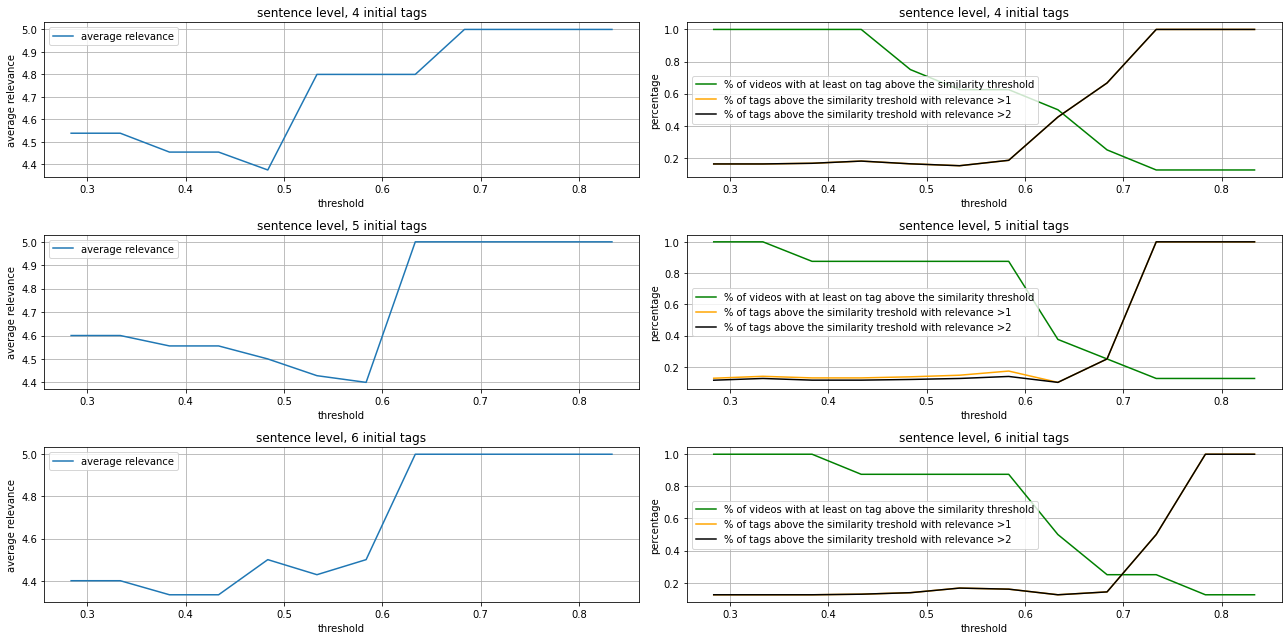

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


min_x=2
max_x=0
file = 'sentence_similarity_sample{0}.csv'
level='sentence'
label='Video_evaluation_rank'
for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  x=sentence_df['similarity_word_2_vec'].values
  min_x=min(min_x,min(x))
  max_x=max(max_x,max(x))

print (min_x,max_x)
thresholds = np.arange(min_x, max_x-0.05, 0.05)
fig, axs = plt.subplots(3, 2, figsize=(18, 9), tight_layout=True)

for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  data=pd.DataFrame(columns=['threshold','score','percent_videos','percent_rel','percent_rel_gte1'])
  print ('*'*20)
  for threshold in thresholds:
    score=(sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>0)][label]+1).mean()
    percent_relevant=len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>0)][label].values)/len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold)]['Video_evaluation_rank'].values)
    percent_relevant_gte1=len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>1)][label].values)/len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold)]['Video_evaluation_rank'].values)
    percent_videos=len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold)]['videoUrl'].unique())/len(sentence_df['videoUrl'].unique())
    data= data.append({'threshold':threshold,'score':score,'percent_videos':percent_videos,'percent_rel': percent_relevant,'percent_rel_gte1': percent_relevant_gte1},ignore_index=True)
  print(data)                           
  axs[i][0].plot(data['threshold'],data['score'],label='average relevance')
  axs[i][1].plot(data['threshold'],data['percent_videos'],label='% of videos with at least on tag above the similarity threshold',color='green')
  axs[i][1].plot(data['threshold'],data['percent_rel'],label='% of tags above the similarity treshold with relevance >1',color='orange')
  axs[i][1].plot(data['threshold'],data['percent_rel_gte1'],label='% of tags above the similarity treshold with relevance >2',color='black')

  axs[i][0].set_xlabel('threshold')
  axs[i][1].set_xlabel('threshold')
  axs[i][0].set_ylabel('average relevance')
  axs[i][1].set_ylabel('percentage')


  axs[i][0].set_title('{0} level, {1} initial tags'.format(level,tag))
  axs[i][1].set_title('{0} level, {1} initial tags'.format(level,tag))
  axs[i][0].grid(True)
  axs[i][1].grid(True)
  axs[i][1].legend()
  axs[i][0].legend()



0.294415295 0.9325279000000001
********************
******************** 0.6
******************** 0.7
   threshold  rating  percent_videos
0        0.6     0.0           0.625
1        0.6     1.0           0.500
2        0.6     2.0           0.500
3        0.6     3.0           0.500
4        0.6     4.0           0.500
5        0.7     0.0           0.250
6        0.7     1.0           0.250
7        0.7     2.0           0.250
8        0.7     3.0           0.125
9        0.7     4.0           0.125
********************
******************** 0.6
******************** 0.7
   threshold  rating  percent_videos
0        0.6     0.0           0.875
1        0.6     1.0           0.500
2        0.6     2.0           0.500
3        0.6     3.0           0.500
4        0.6     4.0           0.375
5        0.7     0.0           0.250
6        0.7     1.0           0.125
7        0.7     2.0           0.125
8        0.7     3.0           0.125
9        0.7     4.0           0.125
*************

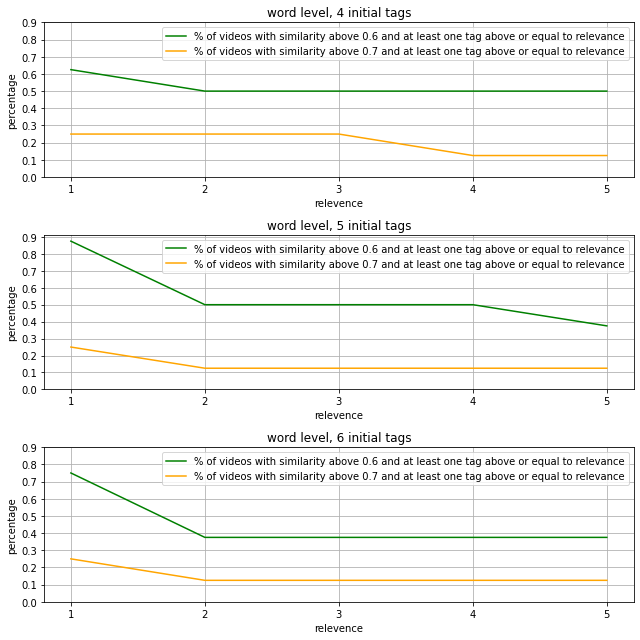

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler


min_x=2
max_x=0
file = 'word_level_{0}.csv'
level='word'
label='Video_evaluation_rank'
for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  x=sentence_df['similarity_word_2_vec'].values
  min_x=min(min_x,min(x))
  max_x=max(max_x,max(x))

print (min_x,max_x)
thresholds = [0.6,0.7]
ratings = np.arange(0,5,step=1, dtype= int)
fig, axs = plt.subplots(3, 1, figsize=(9, 9), tight_layout=True)

for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  data=pd.DataFrame(columns=['threshold','rating','percent_videos'])
  print ('*'*20)
  for threshold in thresholds:
    print ('*'*20, threshold)
    for rating in ratings:
          # print (sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>=rating)][['videoUrl',label,'similarity_word_2_vec']].head(20))
          numerator = len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>=rating)]['videoUrl'].unique())
          # denominator = len(sentence_df[(sentence_df['similarity_word_2_vec']>threshold)]['videoUrl'].unique())
          denominator = len(sentence_df['videoUrl'].unique())
          # print (rating, denominator,numerator)
          percent_videos=numerator/denominator
          data= data.append({'threshold':threshold,'rating':rating, 'percent_videos':percent_videos},ignore_index=True)
  print(data)                 
  axs[i].plot(data[data['threshold']==0.6]['rating']+1,data[data['threshold']==0.6]['percent_videos'],label='% of videos with similarity above 0.6 and at least one tag above or equal to relevance',color='green')
  axs[i].plot(data[data['threshold']==0.7]['rating']+1,data[data['threshold']==0.7]['percent_videos'],label='% of videos with similarity above 0.7 and at least one tag above or equal to relevance',color='orange')


  axs[i].set_xlabel('relevence')
  axs[i].set_ylabel('percentage')
  axs[i].set_xticks(ratings+1)
  axs[i].set_yticks(np.arange(0,1,0.1))

  axs[i].set_title('{0} level, {1} initial tags'.format(level,tag))
  axs[i].grid(True)
  axs[i].legend()

0.294415295 0.9325279000000001
******************** 4 ********************
******************** 0.4
******************** 0.45
******************** 0.5
******************** 0.55
******************** 0.6
******************** 0.6499999999999999
******************** 0.7
******************** 0.75
******************** 0.7999999999999999
   threshold  percent_videos3  percent_videos4
0       0.40            0.125            0.125
1       0.45            0.000            0.000
2       0.50            0.250            0.250
3       0.55            0.125            0.125
4       0.60            0.125            0.125
5       0.65            0.375            0.375
6       0.70            0.250            0.125
7       0.75            0.250            0.125
8       0.80            0.125            0.125
******************** 5 ********************
******************** 0.4
******************** 0.45
******************** 0.5
******************** 0.55
******************** 0.6
******************** 0.649

Text(0.5, 0.98, 'Percent of videos with at least a tag rated above 4, no tag\nrated bellow 3 for all tags with similarity higher than the\nthreshold')

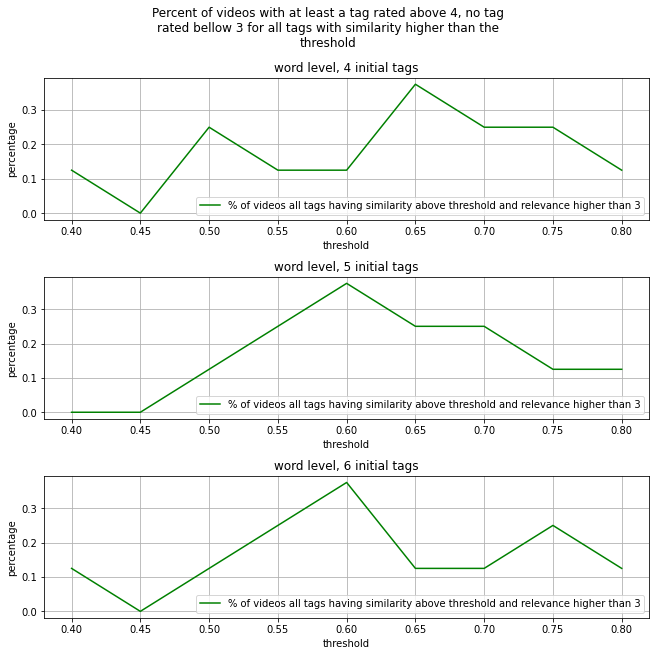

In [78]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler
from textwrap import wrap

def count_ratings(x,threshold, rating,label):
  d={}
  # # print ('*'*20)
  # # print (x.iloc[0]['videoUrl'])
  # # d['higher_{0}'.format(rating)]=len(x[(x[label]>=rating) & (x['similarity_word_2_vec']>=threshold)])
  # # d['lower_{0}'.format(rating)]=len(x[(x[label]<rating) & (x['similarity_word_2_vec']>=threshold)])
  # x0=x.copy()
  # x0['higher']=0
  # x0['lower']=0
  # # # x0.loc[(x0[label]>=rating) & (x0['similarity_word_2_vec']>=threshold),'higher']=1
  # # # x0.loc[(x0[label]<rating-1) & (x0['similarity_word_2_vec']>=threshold) , 'lower']=1
  
  # # d['higher_{0}'.format(rating)]= len(x0[(x0['higher']==1) & (x0['lower']==0)])
  # x0=x0[x0['similarity_word_2_vec']>=threshold]
  # length=len(x0)
  # if (len(x0[x0[label]>=rating-1])==length) and (len(x0[x0[label]>=rating])>=1):
  #     d['higher_{0}'.format(rating)]=1 
  # else:
  #     d['higher_{0}'.format(rating)]=0
  x0=x.copy()
  x0=x0[x0['similarity_word_2_vec']>=threshold]
  # count=x0[x0['similarity_word_2_vec']>=threshold]
  count_higher=len(x0[x0[label]>=rating])
  count_lower=len(x0[x0[label]<rating-1])
  if (count_higher>=1) and (count_lower==0):
    d['higher_{0}'.format(rating)]=1
  else:
    d['higher_{0}'.format(rating)]=0

  return pd.Series(d)


min_x=2
max_x=0
file = 'word_level_{0}.csv'
level='word'
label='Tag_evaluation_rank'
for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  x=sentence_df['similarity_word_2_vec'].values
  min_x=min(min_x,min(x))
  max_x=max(max_x,max(x))

print (min_x,max_x)
thresholds = np.arange(0.4, 0.9-0.05, 0.05)
ratings = np.arange(0,5,step=1, dtype= int)
fig, axs = plt.subplots(3, 1, figsize=(9, 9), constrained_layout=True)

for i,tag in enumerate(range(4,7,1)):
  
  sentence_df=pd.read_csv(file.format(tag))
  data=pd.DataFrame(columns=['threshold','percent_videos3','percent_videos4'])
  print ('*'*20,tag,'*'*20)
  for threshold in thresholds:
    print ('*'*20, threshold)
    # print (sentence_df[(sentence_df['similarity_word_2_vec']>threshold) & (sentence_df[label]>=rating)][['videoUrl',label,'similarity_word_2_vec']].head(20))
    dummy = sentence_df.groupby(['videoUrl']).apply(lambda x: count_ratings(x,threshold,2,label)).reset_index()
    
    numerator_3= len(dummy[dummy['higher_2']>=1]['videoUrl'].unique())

    dummy = sentence_df.groupby(['videoUrl']).apply(lambda x: count_ratings(x,threshold,3,label)).reset_index()

    # print (dummy)
    # print(dummy[dummy['higher_3']>=1]['videoUrl'].unique())
    numerator_4=len(dummy[dummy['higher_3']>=1]['videoUrl'].unique())
    denominator = len(sentence_df['videoUrl'].unique())
    percent_videos_3=numerator_3/denominator
    percent_videos_4=numerator_4/denominator
    data= data.append({'threshold':threshold,'percent_videos3':percent_videos_3,'percent_videos4':percent_videos_4},ignore_index=True)
  print(data)                 
  axs[i].plot(data['threshold'],data['percent_videos3'],label='% of videos all tags having similarity above threshold and relevance higher than 3',color='green')
  # axs[i].plot(data['threshold'],data['percent_videos4'],label='% of videos all tags having similarity above threshold and relevance higher than 4',color='orange')
  axs[i].set_xlabel('threshold')
  axs[i].set_ylabel('percentage')
  # axs[i].set_xticks(ratings+1)
  # axs[i].set_yticks(np.arange(0,1,0.1))

  axs[i].set_title('{0} level, {1} initial tags'.format(level,tag))
  axs[i].grid(True)
  axs[i].legend()
# fig.subplots_adjust(top=0.95) # pad a little
fig.suptitle("\n".join(wrap('Percent of videos with at least a tag rated above 4, no tag rated bellow 3 for all tags with similarity higher than the threshold',60)))

In [0]:
sentence_df[sentence_df['similarity_word_2_vec']>=0.6]['videoUrl'].unique()

array(['https://www.youtube.com/watch?v=4jk0Cq_vU2A',
       'https://www.youtube.com/watch?v=9Hh_vdDk4Kg',
       'https://www.youtube.com/watch?v=Bbk5RcH0bbQ',
       'https://www.youtube.com/watch?v=c_XnMwhAI4I',
       'https://www.youtube.com/watch?v=J6eJtNvTWII',
       'https://www.youtube.com/watch?v=XMA7r6xlwH8'], dtype=object)

In [0]:
sentence_df[sentence_df['videoUrl']=='https://www.youtube.com/watch?v=J6eJtNvTWII']

,Unnamed: 0,index,Category,videoUrl,Title,Tags,cluster,google_trends,similarity_word_2_vec,Video_evaluation,Tag_evaluation,Video_evaluation_rank,Tag_evaluation_rank
40,2,449,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,baking bread,0.761883,0,1,0,3
41,4,554,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,garlic bread recipe,0.713766,0,0,0,0
42,5,454,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,banana bread recipe moist,0.701817,0,1,0,3
43,6,450,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,baking cakes,0.699889,0,1,0,4
44,7,470,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,butter chicken,0.694417,0,0,0,0
45,9,467,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,bread pudding,0.683450,0,1,0,4
46,10,621,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,no knead bread,0.681086,0,1,0,2
47,11,521,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,cream cheese pound cake,0.677371,0,0,0,0
48,12,453,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,banana bread recipe,0.677164,0,0,0,0
49,14,597,Food & Drinks,https://www.youtube.com/watch?v=J6eJtNvTWII,HOW TO MAKE THIN n CRISPY POTATO CHIPS,"cooking show, white sugar, butter, simplecooki...",butter cooking baking,jenny can cook bread,0.648553,0,1,0,1
